In [2]:
import pandas as pd
import numpy as np

In [3]:
stock=np.random.normal(0,1,(3,4))

In [4]:
stock_rise=pd.DataFrame(stock)
stock_rise.shape[0]

3

In [5]:
stock_code=["股票{}".format(i+1)for i in range(stock_rise.shape[0])]
stock_code

['股票1', '股票2', '股票3']

In [6]:
pd.DataFrame(stock,index=stock_code)

,0,1,2,3
股票1,0.558861,-0.965747,-0.515541,-0.371003
股票2,-0.004436,-0.979775,-0.885179,-0.120849
股票3,-0.288220,1.803764,-2.263130,-0.272247


In [7]:
date=pd.date_range(start='2017-01-01',periods=stock_rise.shape[1],freq="B")

In [8]:
date

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05'], dtype='datetime64[ns]', freq='B')

In [9]:
stock_c=pd.DataFrame(stock,index=stock_code,columns=date)

In [10]:
stock_c.T

,股票1,股票2,股票3
2017-01-02,0.558861,-0.004436,-0.288220
2017-01-03,-0.965747,-0.979775,1.803764
2017-01-04,-0.515541,-0.885179,-2.263130
2017-01-05,-0.371003,-0.120849,-0.272247


In [11]:
stock_c.head(1)

,2017-01-02,2017-01-03,2017-01-04,2017-01-05
股票1,0.558861,-0.965747,-0.515541,-0.371003


## 设置索引

In [12]:
stock_code=["股票{}__".format(i+1)for i in range(stock_rise.shape[0])]
stock_c.index=stock_code
stock_c

,2017-01-02,2017-01-03,2017-01-04,2017-01-05
股票1__,0.558861,-0.965747,-0.515541,-0.371003
股票2__,-0.004436,-0.979775,-0.885179,-0.120849
股票3__,-0.288220,1.803764,-2.263130,-0.272247


## 重设索引

In [13]:
stock_c.reset_index()

,index,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00
0,股票1__,0.558861,-0.965747,-0.515541,-0.371003
1,股票2__,-0.004436,-0.979775,-0.885179,-0.120849
2,股票3__,-0.288220,1.803764,-2.263130,-0.272247


In [14]:
stock_c.reset_index(drop=True)

,2017-01-02,2017-01-03,2017-01-04,2017-01-05
0,0.558861,-0.965747,-0.515541,-0.371003
1,-0.004436,-0.979775,-0.885179,-0.120849
2,-0.288220,1.803764,-2.263130,-0.272247


In [15]:
df=pd.DataFrame({'m':[1,2],
                'y':[2,3],
                's':[4,5]})

In [16]:
df

,m,y,s
0,1,2,4
1,2,3,5


In [17]:
df.set_index(keys=['y'])

,m,s
y,,
2,1,4
3,2,5


In [18]:
df.set_index(keys=['y','m'])

,,s
y,m,
2,1,4
3,2,5


# MultiIndex and panel

In [21]:
df

,m,y,s
0,1,2,4
1,2,3,5


In [23]:
df.index

RangeIndex(start=0, stop=2, step=1)

In [24]:
df.index.names

FrozenList([None])

## panel

In [25]:
np.arange(24).reshape(4,3,2)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [38]:
p = pd.Panel(np.arange(24).reshape(4, 3, 2),
             items=list('ABCD'),
             major_axis=pd.date_range('20130101',periods=3),
             minor_axis=['first','second'])


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  """Entry point for launching an IPython kernel.


TypeError: Panel() takes no arguments

## Series

In [39]:
stock_c

,2017-01-02,2017-01-03,2017-01-04,2017-01-05
股票1__,0.558861,-0.965747,-0.515541,-0.371003
股票2__,-0.004436,-0.979775,-0.885179,-0.120849
股票3__,-0.288220,1.803764,-2.263130,-0.272247


In [40]:
type(stock_c['2017-01-02'])

pandas.core.series.Series

In [42]:
pd.Series(np.arange(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

In [46]:
series_demo=pd.Series({"red":10,"green":20})

In [47]:
series_demo.index

Index(['red', 'green'], dtype='object')

## Pandas索引

In [48]:
#索引操作，先列后行
stock_c['2017-01-02']['股票1__']

0.5588605523836202

In [54]:
stock_c.loc['股票1__':'股票3__']

,2017-01-02,2017-01-03,2017-01-04,2017-01-05
股票1__,0.558861,-0.965747,-0.515541,-0.371003
股票2__,-0.004436,-0.979775,-0.885179,-0.120849
股票3__,-0.288220,1.803764,-2.263130,-0.272247


In [56]:
stock_c.iloc[:3,:3]

,2017-01-02,2017-01-03,2017-01-04
股票1__,0.558861,-0.965747,-0.515541
股票2__,-0.004436,-0.979775,-0.885179
股票3__,-0.288220,1.803764,-2.263130


In [59]:
stock_c.loc[stock_c.index[:2],("2017-01-02")]

股票1__    0.558861
股票2__   -0.004436
Name: 2017-01-02 00:00:00, dtype: float64

## 赋值操作

In [60]:
stock_c['2017-01-02']=100

In [61]:
stock_c

,2017-01-02,2017-01-03,2017-01-04,2017-01-05
股票1__,100,-0.965747,-0.515541,-0.371003
股票2__,100,-0.979775,-0.885179,-0.120849
股票3__,100,1.803764,-2.263130,-0.272247


## 排序

In [69]:
stock_c.sort_values(by='2017-01-05',ascending=True)

,2017-01-02,2017-01-03,2017-01-04,2017-01-05
股票1__,100,-0.965747,-0.515541,-0.371003
股票3__,100,1.803764,-2.263130,-0.272247
股票2__,100,-0.979775,-0.885179,-0.120849


In [70]:
stock_c.sort_values(by=['2017-01-04','2017-01-05'],ascending=True)

,2017-01-02,2017-01-03,2017-01-04,2017-01-05
股票3__,100,1.803764,-2.263130,-0.272247
股票2__,100,-0.979775,-0.885179,-0.120849
股票1__,100,-0.965747,-0.515541,-0.371003


In [71]:
stock_c.sort_index()

,2017-01-02,2017-01-03,2017-01-04,2017-01-05
股票1__,100,-0.965747,-0.515541,-0.371003
股票2__,100,-0.979775,-0.885179,-0.120849
股票3__,100,1.803764,-2.263130,-0.272247


In [73]:
stock_c['2017-01-05'].sort_values(ascending=True)

股票1__   -0.371003
股票3__   -0.272247
股票2__   -0.120849
Name: 2017-01-05 00:00:00, dtype: float64

## 运算

In [74]:
stock_c=stock_c.T

In [76]:
stock_c["股票1__"].add(10)

2017-01-02    110.000000
2017-01-03      9.034253
2017-01-04      9.484459
2017-01-05      9.628997
Freq: B, Name: 股票1__, dtype: float64

In [83]:
stock_c

,股票1__,股票2__,股票3__
2017-01-02,100.000000,100.000000,100.000000
2017-01-03,-0.965747,-0.979775,1.803764
2017-01-04,-0.515541,-0.885179,-2.263130
2017-01-05,-0.371003,-0.120849,-0.272247


In [84]:
stock_c[stock_c['股票1__'].isin([100,120])]

,股票1__,股票2__,股票3__
2017-01-02,100.0,100.0,100.0


## 统计运输

In [85]:
stock_c.describe()

,股票1__,股票2__,股票3__
count,4.000000,4.000000,4.000000
mean,24.536927,24.503549,24.817097
std,50.309353,50.332436,50.149431
min,-0.965747,-0.979775,-2.263130
25%,-0.628093,-0.908828,-0.769968
50%,-0.443272,-0.503014,0.765759
75%,24.721748,24.909363,26.352823
max,100.000000,100.000000,100.000000


In [89]:
stock_c.sum(axis=0)

股票1__    98.147709
股票2__    98.014196
股票3__    99.268387
dtype: float64

In [87]:
stock_c.idxmin(axis=0)

股票1__   2017-01-03
股票2__   2017-01-03
股票3__   2017-01-04
dtype: datetime64[ns]

In [88]:
stock_c

,股票1__,股票2__,股票3__
2017-01-02,100.000000,100.000000,100.000000
2017-01-03,-0.965747,-0.979775,1.803764
2017-01-04,-0.515541,-0.885179,-2.263130
2017-01-05,-0.371003,-0.120849,-0.272247


In [90]:
data=stock_c.sort_index()

In [92]:
data_rise=data["股票1__"]

In [94]:
data_rise.cumsum()

2017-01-02    100.000000
2017-01-03     99.034253
2017-01-04     98.518712
2017-01-05     98.147709
Freq: B, Name: 股票1__, dtype: float64

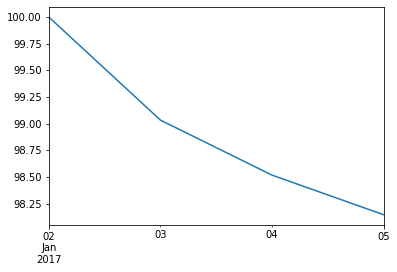

In [97]:
data_rise.cumsum().plot()

## 自定义运算

In [98]:
data

,股票1__,股票2__,股票3__
2017-01-02,100.000000,100.000000,100.000000
2017-01-03,-0.965747,-0.979775,1.803764
2017-01-04,-0.515541,-0.885179,-2.263130
2017-01-05,-0.371003,-0.120849,-0.272247


In [100]:
data[['股票1__','股票2__']].apply(lambda x: x.max()-x.min(),axis=0)

股票1__    100.965747
股票2__    100.979775
dtype: float64

In [104]:
data[0:2].to_csv("./test.csv",columns=["股票1__"],index=False)

In [105]:
pd.isnull(data)

,股票1__,股票2__,股票3__
2017-01-02,False,False,False
2017-01-03,False,False,False
2017-01-04,False,False,False
2017-01-05,False,False,False


In [107]:
data_p=data["股票1__"]

In [108]:
pd.qcut(data_p,q=10)

2017-01-02     (69.889, 100.0]
2017-01-03    (-0.967, -0.831]
2017-01-04    (-0.561, -0.487]
2017-01-05       (-0.4, 9.666]
Freq: B, Name: 股票1__, dtype: category
Categories (10, interval[float64]): [(-0.967, -0.831] < (-0.831, -0.696] < (-0.696, -0.561] < (-0.561, -0.487] ... (-0.4, 9.666] < (9.666, 39.777] < (39.777, 69.889] < (69.889, 100.0]]

In [112]:
qcut_r=pd.qcut(data_p,q=3)#q是分成几组

In [113]:
qcut_r.value_counts()

(-0.967, -0.516]    2
(-0.371, 100.0]     1
(-0.516, -0.371]    1
Name: 股票1__, dtype: int64

In [118]:
pd.get_dummies(qcut_r,prefix="xxxxx")

,"xxxxx_(-0.967, -0.516]","xxxxx_(-0.516, -0.371]","xxxxx_(-0.371, 100.0]"
2017-01-02,0,0,1
2017-01-03,1,0,0
2017-01-04,1,0,0
2017-01-05,0,1,0


In [119]:
dummies=pd.get_dummies(qcut_r,prefix="xxxxx")

In [122]:
pd.concat([qcut_r,dummies],axis=1)

,股票1__,"xxxxx_(-0.967, -0.516]","xxxxx_(-0.516, -0.371]","xxxxx_(-0.371, 100.0]"
2017-01-02,"(-0.371, 100.0]",0,0,1
2017-01-03,"(-0.967, -0.516]",1,0,0
2017-01-04,"(-0.967, -0.516]",1,0,0
2017-01-05,"(-0.516, -0.371]",0,1,0


In [126]:
data['p_n']=np.where(data['股票1__']>0,1,0)
data

,股票1__,股票2__,股票3__,p_n
2017-01-02,100.000000,100.000000,100.000000,1
2017-01-03,-0.965747,-0.979775,1.803764,0
2017-01-04,-0.515541,-0.885179,-2.263130,0
2017-01-05,-0.371003,-0.120849,-0.272247,0


In [127]:
time=pd.to_datetime(data.index)

In [129]:
data["week"]=time.weekday

In [130]:
data

,股票1__,股票2__,股票3__,p_n,week
2017-01-02,100.000000,100.000000,100.000000,1,0
2017-01-03,-0.965747,-0.979775,1.803764,0,1
2017-01-04,-0.515541,-0.885179,-2.263130,0,2
2017-01-05,-0.371003,-0.120849,-0.272247,0,3


In [132]:
pd.crosstab(data['p_n'],data["week"])

week,0,1,2,3
p_n,,,,
0,0,1,1,1
1,1,0,0,0


In [144]:
count=pd.crosstab(data["week"],data["股票1__"])
count

股票1__,-0.965747,-0.515541,-0.371003,100.000000
week,,,,
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0


In [148]:
sum=count.sum(axis=1)

In [149]:
sum

week
0    1
1    1
2    1
3    1
dtype: int64

In [153]:
per=count.div(sum,axis=0)

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31080 missing from current font.
  font.set_text(s, 0, flags=flags)


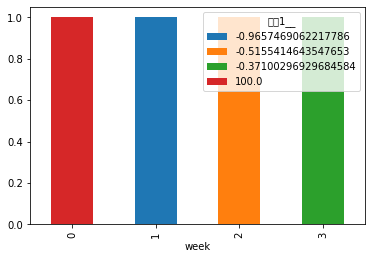

In [156]:
per.plot(kind='bar',stacked=True)

In [159]:
data.pivot_table(["p_n"],index="week")

,p_n
week,
0,1
1,0
2,0
3,0


In [162]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [163]:
col.groupby(['color'])['price1'].mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [164]:
 col['price1'].groupby(col['color']).mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [166]:
col.groupby(['color'],as_index=False)['price1'].mean()

,color,price1
0,green,2.025
1,red,2.380
2,white,5.560
